# 

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from traffic.core import Traffic

#with open('', 'rb') as f:
df_original = Traffic.from_file('/mnt/data/synthair/synthair_diffusion/data/opensky/OpenSky_EHAM_LIMC_trajectories.pkl')
df_test = Traffic.from_file('./resampled/combined_traffic_resampled_200.pkl')
#df_2 = Traffic.from_file('./OpenSky_EHAM_LIMC_trajectories.pkl')
#df_original = df_original + df_2
import pandas as pd
import numpy as np
from geopy.distance import geodesic

In [14]:
df_test.data

,timestamp,icao24,callsign,latitude,longitude,altitude,ADEP,ADES,groundspeed,track,...,track_unwrapped,cumdist,compute_gs,compute_track,latitude_sin,latitude_cos,longitude_sin,longitude_cos,latitude_2,longitude_2
0,2018-05-29 10:22:46+00:00,300064,AZA107,52.354509,4.752686,1975.0,EHAM,LIRF,157.0,23.629378,...,23.629378,0.000000,152.526537,35.875120,0.791805,0.610774,0.082855,0.996562,52.354509,4.752686
1,2018-05-29 10:23:22+00:00,300064,AZA107,52.375076,4.776993,2925.0,EHAM,LIRF,155.0,68.749494,...,68.749494,1.525265,152.526537,35.875120,0.792024,0.610490,0.083278,0.996526,52.375076,4.776993
2,2018-05-29 10:23:58+00:00,300064,AZA107,52.371174,4.819467,3675.0,EHAM,LIRF,178.0,103.645951,...,103.645951,3.104700,157.943439,98.519174,0.791983,0.610544,0.084016,0.996464,52.371174,4.819467
3,2018-05-29 10:24:34+00:00,300064,AZA107,52.345642,4.854202,4175.0,EHAM,LIRF,244.0,173.400083,...,173.400083,5.101224,199.652446,140.193840,0.791710,0.610897,0.084620,0.996413,52.345642,4.854202
4,2018-05-29 10:25:09+00:00,300064,AZA107,52.304232,4.853054,5375.0,EHAM,LIRF,274.0,182.507702,...,182.507702,7.589602,255.947455,180.974263,0.791269,0.611469,0.084601,0.996415,52.304232,4.853054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021-10-29 21:13:13+00:00,c2b355,CFC01,42.082581,12.101128,5150.0,EHAM,LIRF,208.0,141.039542,...,141.039542,714.230312,209.176268,140.787209,0.670201,0.742180,0.209638,0.977779,42.082581,12.101128
196,2021-10-29 21:13:47+00:00,c2b355,CFC01,42.056130,12.125202,4575.0,EHAM,LIRF,201.0,159.044223,...,159.044223,716.147073,202.951156,145.850220,0.669858,0.742489,0.210049,0.977691,42.056130,12.125202
197,2021-10-29 21:14:22+00:00,c2b355,CFC01,42.025079,12.138487,4200.0,EHAM,LIRF,198.0,162.939886,...,162.939886,718.101755,201.052985,162.305241,0.669456,0.742852,0.210275,0.977642,42.025079,12.138487
198,2021-10-29 21:14:58+00:00,c2b355,CFC01,41.994049,12.151191,3550.0,EHAM,LIRF,191.0,162.323891,...,162.323891,720.047600,194.584515,163.016871,0.669053,0.743214,0.210492,0.977596,41.994049,12.151191


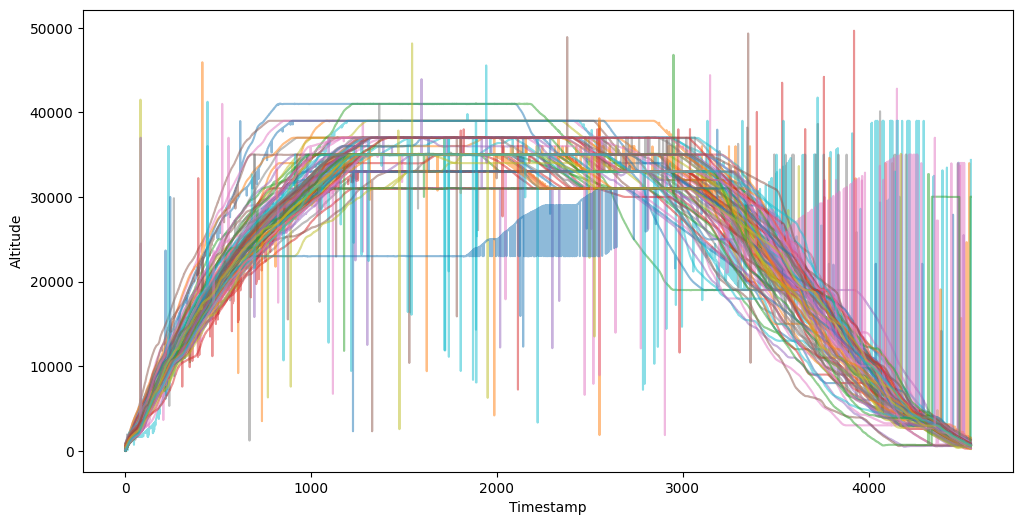

In [5]:
#df_original.data
plt.figure(figsize=(12, 6))
for i in df_original[:100]:
    #flight_to_plot = cleaned_flights[0]  # Example: plot the first flight
    df_plot = i.data
    plt.plot(np.arange(0, len(i)), df_plot['altitude'], alpha=0.5, label='Original Altitude')
    #plt.plot(df_plot['timestamp'], df_plot['altitude_cleaned'], 'g-', label='Cleaned Altitude (Outliers Removed)')
    #plt.plot(df_plot['timestamp'], df_plot['altitude_smoothed'], 'r-', label='Smoothed Altitude')
plt.xlabel('Timestamp')
plt.ylabel('Altitude')
#plt.title(f'Altitude Data for Flight {flight_to_plot.callsign}')
#plt.legend
plt.show()

In [8]:
df = df_test.data
df["latitude_sin"] = np.sin(np.radians(df["latitude"]))
df["latitude_cos"] = np.cos(np.radians(df["latitude"]))
df["longitude_sin"] = np.sin(np.radians(df["longitude"]))
df["longitude_cos"] = np.cos(np.radians(df["longitude"]))
df

,timestamp,icao24,callsign,latitude,longitude,altitude,ADEP,ADES,groundspeed,track,...,timedelta,cluster,track_unwrapped,cumdist,compute_gs,compute_track,latitude_sin,latitude_cos,longitude_sin,longitude_cos
0,2018-05-29 10:22:46+00:00,300064,AZA107,52.354509,4.752686,1975.0,EHAM,LIRF,157.0,23.629378,...,0.0,0,23.629378,0.000000,152.526537,35.875120,0.791805,0.610774,0.082855,0.996562
1,2018-05-29 10:23:22+00:00,300064,AZA107,52.375076,4.776993,2925.0,EHAM,LIRF,155.0,68.749494,...,36.0,0,68.749494,1.525265,152.526537,35.875120,0.792024,0.610490,0.083278,0.996526
2,2018-05-29 10:23:58+00:00,300064,AZA107,52.371174,4.819467,3675.0,EHAM,LIRF,178.0,103.645951,...,72.0,0,103.645951,3.104700,157.943439,98.519174,0.791983,0.610544,0.084016,0.996464
3,2018-05-29 10:24:34+00:00,300064,AZA107,52.345642,4.854202,4175.0,EHAM,LIRF,244.0,173.400083,...,108.0,0,173.400083,5.101224,199.652446,140.193840,0.791710,0.610897,0.084620,0.996413
4,2018-05-29 10:25:09+00:00,300064,AZA107,52.304232,4.853054,5375.0,EHAM,LIRF,274.0,182.507702,...,143.0,0,182.507702,7.589602,255.947455,180.974263,0.791269,0.611469,0.084601,0.996415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021-10-29 21:13:13+00:00,c2b355,CFC01,42.082581,12.101128,5150.0,EHAM,LIRF,208.0,141.039542,...,6782.0,0,141.039542,714.230312,209.176268,140.787209,0.670201,0.742180,0.209638,0.977779
196,2021-10-29 21:13:47+00:00,c2b355,CFC01,42.056130,12.125202,4575.0,EHAM,LIRF,201.0,159.044223,...,6816.0,0,159.044223,716.147073,202.951156,145.850220,0.669858,0.742489,0.210049,0.977691
197,2021-10-29 21:14:22+00:00,c2b355,CFC01,42.025079,12.138487,4200.0,EHAM,LIRF,198.0,162.939886,...,6851.0,0,162.939886,718.101755,201.052985,162.305241,0.669456,0.742852,0.210275,0.977642
198,2021-10-29 21:14:58+00:00,c2b355,CFC01,41.994049,12.151191,3550.0,EHAM,LIRF,191.0,162.323891,...,6887.0,0,162.323891,720.047600,194.584515,163.016871,0.669053,0.743214,0.210492,0.977596


In [9]:
def convert_sin_cos_to_lat_lon(df):
    # Calculate latitude from sine and cosine
    df["latitude_2"] = np.degrees(np.arctan2(df["latitude_sin"], df["latitude_cos"]))
    
    # Calculate longitude from sine and cosine
    df["longitude_2"] = np.degrees(np.arctan2(df["longitude_sin"], df["longitude_cos"]))
    
    return df

convert_sin_cos_to_lat_lon(df)

,timestamp,icao24,callsign,latitude,longitude,altitude,ADEP,ADES,groundspeed,track,...,track_unwrapped,cumdist,compute_gs,compute_track,latitude_sin,latitude_cos,longitude_sin,longitude_cos,latitude_2,longitude_2
0,2018-05-29 10:22:46+00:00,300064,AZA107,52.354509,4.752686,1975.0,EHAM,LIRF,157.0,23.629378,...,23.629378,0.000000,152.526537,35.875120,0.791805,0.610774,0.082855,0.996562,52.354509,4.752686
1,2018-05-29 10:23:22+00:00,300064,AZA107,52.375076,4.776993,2925.0,EHAM,LIRF,155.0,68.749494,...,68.749494,1.525265,152.526537,35.875120,0.792024,0.610490,0.083278,0.996526,52.375076,4.776993
2,2018-05-29 10:23:58+00:00,300064,AZA107,52.371174,4.819467,3675.0,EHAM,LIRF,178.0,103.645951,...,103.645951,3.104700,157.943439,98.519174,0.791983,0.610544,0.084016,0.996464,52.371174,4.819467
3,2018-05-29 10:24:34+00:00,300064,AZA107,52.345642,4.854202,4175.0,EHAM,LIRF,244.0,173.400083,...,173.400083,5.101224,199.652446,140.193840,0.791710,0.610897,0.084620,0.996413,52.345642,4.854202
4,2018-05-29 10:25:09+00:00,300064,AZA107,52.304232,4.853054,5375.0,EHAM,LIRF,274.0,182.507702,...,182.507702,7.589602,255.947455,180.974263,0.791269,0.611469,0.084601,0.996415,52.304232,4.853054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021-10-29 21:13:13+00:00,c2b355,CFC01,42.082581,12.101128,5150.0,EHAM,LIRF,208.0,141.039542,...,141.039542,714.230312,209.176268,140.787209,0.670201,0.742180,0.209638,0.977779,42.082581,12.101128
196,2021-10-29 21:13:47+00:00,c2b355,CFC01,42.056130,12.125202,4575.0,EHAM,LIRF,201.0,159.044223,...,159.044223,716.147073,202.951156,145.850220,0.669858,0.742489,0.210049,0.977691,42.056130,12.125202
197,2021-10-29 21:14:22+00:00,c2b355,CFC01,42.025079,12.138487,4200.0,EHAM,LIRF,198.0,162.939886,...,162.939886,718.101755,201.052985,162.305241,0.669456,0.742852,0.210275,0.977642,42.025079,12.138487
198,2021-10-29 21:14:58+00:00,c2b355,CFC01,41.994049,12.151191,3550.0,EHAM,LIRF,191.0,162.323891,...,162.323891,720.047600,194.584515,163.016871,0.669053,0.743214,0.210492,0.977596,41.994049,12.151191


In [11]:
Traffic(df).to_pickle("./resampled/combined_traffic_resampled_200.pkl")

In [ ]:
import traffic
traffic.config_file
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from cartes.crs import Lambert93, EuroPP
# Assuming each flight in df_test has a 'cluster' attribute
# Get the unique clusters
clusters = df_test.data['cluster'].unique()
colors = cm.get_cmap("tab10", len(clusters))  # Choose a colormap and define number of clusters

# Create a dictionary to map each cluster to a color
cluster_colors = {cluster: colors(i) for i, cluster in enumerate(clusters)}

with plt.style.context("traffic"):
    fig, ax = plt.subplots(1, subplot_kw=dict(projection=EuroPP()))
    
    for flight in df_test:
        cluster = flight.data['cluster'].unique()[0] # Get the cluster for the current flight
        
        color = cluster_colors[cluster]  # Get the color associated with this cluster
        flight.plot(ax, color=color)  # Plot with the assigned color

plt.show()

In [ ]:
print(clusters)

In [ ]:

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
    # clustering
print("Clustering...")

df_2

In [ ]:
#df_test = df_2.clean_invalid().drop_duplicates().filter().resample(200).eval()  # multiprocessed (watch your RAM usage!)

df_test = df_2.drop_duplicates().resample(200).eval()
df_test.data

In [ ]:
from cartes.crs import Lambert93, EuroPP
with plt.style.context("traffic"):
    fig, ax = plt.subplots(1, subplot_kw=dict(projection=EuroPP()))
    for flight in df_test:
        flight.plot(ax)

plt.show()

# Density

In [ ]:
import matplotlib.pyplot as plt

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from cartopy.crs import EuroPP, PlateCarree
from cartes.utils.features import countries, ocean


with plt.style.context("traffic"):

    fig = plt.figure(figsize=(15, 10), frameon=False)
    ax = fig.subplots(1, 2, subplot_kw=dict(projection=EuroPP()))

    for ax_ in ax:
        ax_.add_feature(countries(scale="10m", linewidth=1.5))

    vmax = None  # this trick will keep the same colorbar scale for both maps

    for i, data in enumerate([df_test]):
        # Aggregate and query the data, then convert to xarray
        data_xarray = data.agg_latlon(
            # 10 points per integer lat/lon
            resolution=dict(latitude=10, longitude=10),
            # count the number of flights
            flight_id="nunique"
        ).query(f"flight_id > 1").to_xarray()

        # Sort the DataArray by latitude and longitude
        data_xarray = data_xarray.sortby(['latitude', 'longitude'])

        # Plot the data using pcolormesh
        cax = data_xarray.flight_id.plot.pcolormesh(
            ax=ax[i],
            cmap="viridis",
            transform=PlateCarree(),
            vmax=vmax,
            add_colorbar=False,
        )

        cbaxes = inset_axes(ax[i], "4%", "60%", loc=3)
        cb = fig.colorbar(cax, cax=cbaxes)

        # Keep this value to scale the colorbar for the second day
        vmax = cb.vmax

        text = AnchoredText(
            f"{data.start_time:%B %d, %Y}",
            loc=1,
            prop={"size": 24, "fontname": "Ubuntu"},
            frameon=True,
        )
        text.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax[i].add_artist(text)

    fig.set_tight_layout(True)

    plt.show()

# Jensen-Shannon Distance

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.special import rel_entr
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt

# Assuming df_2 is a traffic.core.Traffic object containing trajectories
# Split the traffic object into two halves based on a criterion
split_index = len(df_2) // 2  # Split at half the number of trajectories

# Create two subsets (you can change the criteria if you want)
df_subset1 = df_test[:split_index]
df_subset2 = df_test[split_index:]

# Convert the first subset to a DataFrame and extract lat/lon
subset1_data = df_subset1.data[['latitude', 'longitude']].dropna().values
subset2_data = df_subset2.data[['latitude', 'longitude']].dropna().values

# Kernel Density Estimation (KDE) for both subsets
kde_subset1 = gaussian_kde(subset1_data.T)
kde_subset2 = gaussian_kde(subset2_data.T)

# Create grid to evaluate KDEs over a common region (latitude, longitude)
xgrid, ygrid = np.mgrid[
    min(subset1_data[:, 0].min(), subset2_data[:, 0].min()):max(subset1_data[:, 0].max(), subset2_data[:, 0].max()):100j,
    min(subset1_data[:, 1].min(), subset2_data[:, 1].min()):max(subset1_data[:, 1].max(), subset2_data[:, 1].max()):100j
]

grid_coords = np.vstack([xgrid.ravel(), ygrid.ravel()])

# Evaluate the KDEs on the grid
subset1_density = kde_subset1(grid_coords).reshape(100, 100)
subset2_density = kde_subset2(grid_coords).reshape(100, 100)

# Normalize densities to ensure they sum to 1 (turn them into probabilities)
subset1_density /= np.sum(subset1_density)
subset2_density /= np.sum(subset2_density)

# Add a small constant to avoid zeros in the densities
epsilon = 1e-10
subset1_density += epsilon
subset2_density += epsilon

# Compute the average distribution M
M = 0.5 * (subset1_density + subset2_density)

# Calculate Jensen-Shannon distance using the scipy.spatial.distance.jensenshannon method
js_distance = jensenshannon(subset1_density.ravel(), subset2_density.ravel(), base=2)
kl_divergence = np.sum(rel_entr(subset1_density, subset2_density))

print(f"KL Divergence between the two subsets: {kl_divergence}")

print(f"Jensen-Shannon Distance between the two subsets: {js_distance}")

# Plotting the KDEs for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(subset1_density, origin='lower', cmap='Blues', extent=[xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()])
ax[0].set_title("Subset 1 Density")

ax[1].imshow(subset2_density, origin='lower', cmap='Reds', extent=[xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()])
ax[1].set_title("Subset 2 Density")

plt.tight_layout()
plt.show()

# Airspace

In [ ]:
from cartopy.crs import EuroPP, PlateCarree
from traffic.data import nm_airspaces
with plt.style.context('traffic'):
    fig = plt.figure()
    ax = plt.axes(projection=PlateCarree())

    ax.add_feature(countries())
    ax.gridlines()
    ax.set_extent(nm_airspaces['LFFFUIR'])

    nm_airspaces['LFFFUIR'].plot(ax, lw=2, alpha=.5, linestyle='dashed')
    df_test.plot(ax, marker='.')

    # display elementary sectors (ES) crossed by the trajectory
    for airspace in nm_airspaces.search("LF.*/ES"):
        if df_test.intersects(airspace):
            airspace.plot(ax, alpha=.5, lw=2)

# Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_2 is a traffic.core.Traffic object containing trajectories
# Split the traffic object into two halves based on a criterion
split_index = len(df_2) // 2  # Split at half the number of trajectories

# Create two subsets (you can change the criteria if you want)
df_subset1 = df_test[:split_index]
df_subset2 = df_test[split_index:]

# Convert both subsets to DataFrames and extract lat/lon
subset1_data = df_subset1.data[['latitude', 'longitude', 'altitude']].values
subset2_data = df_subset2.data[['latitude', 'longitude', 'altitude']].values

# Combine both subsets for PCA, and create labels for coloring
combined_data = np.vstack([subset1_data, subset2_data])
labels = np.array([0] * len(subset1_data) + [1] * len(subset2_data))

# Standardize the data (important for PCA)
scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data_scaled)

# Split the PCA results back into two subsets
pca_subset1 = pca_result[labels == 0]
pca_subset2 = pca_result[labels == 1]

# Plot the 2D PCA result
plt.figure(figsize=(10, 7))
plt.scatter(pca_subset1[:, 0], pca_subset1[:, 1], color='blue', label='Subset 1', alpha=0.5)
plt.scatter(pca_subset2[:, 0], pca_subset2[:, 1], color='red', label='Subset 2', alpha=0.5)

# Add labels and legend
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Trajectory Subsets')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_2 = df_2.drop_duplicates().resample(200).eval()
#df_2.to_pickle("other_features_200.pkl")

In [ ]:
df_test = Traffic(df_2.data[['flight_id', 'icao24', 'timestamp', 'altitude', 'ADEP', 'ADES', 'groundspeed', 'track', 'vertical_rate', 'timedelta']])

In [ ]:
def plot_trajectory(traffic):
    """
    Plots a 3D trajectory based on groundspeed, track, and vertical rate.
    
    Parameters:
    - groundspeed: List or array of groundspeed values (in m/s or appropriate units)
    - track: List or array of track values (in degrees, where 0 = North, 90 = East)
    - vertical_rate: List or array of vertical rate values (in m/s)
    - time_interval: Time interval between each point (in seconds), default is 1 second
    """
    # Convert track angles from degrees to radians for trigonometric calculations
    #from cartes.crs import Lambert93
    with plt.style.context("traffic"):
        fig, ax = plt.subplots()

        for (i, flight) in enumerate(traffic):
            if i == 400:
                break
            track = flight.data['track']
            groundspeed = flight.data['groundspeed']
            time_interval = flight.data['timedelta']
            
            #flight.plot(ax)
            track_rad = np.radians(track)
            
            # Calculate the change in position for each time step (horizontal velocity components)
            dx = groundspeed * np.sin(track_rad) * time_interval  # Change in x-direction (East)
            dy = groundspeed * np.cos(track_rad) * time_interval  # Change in y-direction (North)
            
            # Integrate to get the cumulative positions
            x = np.cumsum(dx)  # Cumulative sum of changes in x-direction
            y = np.cumsum(dy)  # Cumulative sum of changes in y-direction
            
            # Integrate vertical rate to get altitude (z)
            #z = np.cumsum(vertical_rate * time_interval)  # Cumulative sum of altitude changes
            
            # Time array for plotting
            time = np.arange(len(groundspeed)) * time_interval
            
            # 3D Plot

            
            ax.plot(x, y)
        ax.set_xlabel('X (East)')
        ax.set_ylabel('Y (North)')
        #ax.set_zlabel('Altitude (m)')
        ax.set_title('3D Trajectory Plot')
        ax.legend()
        
        plt.show()

a = df_test.query("flight_id == '3848da_FWWQA_20210615_170605'")
plot_trajectory(df_test)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from cartes.crs import EuroPP

t_gmm = df_2.drop_duplicates().clustering(
    nb_samples=15,
    projection=EuroPP(),
    features=["x", "y", "track_unwrapped"],
    clustering=GaussianMixture(n_components=19),
    transform=StandardScaler(),
).fit_predict()

dict(t_gmm.groupby(["cluster"]).agg({"flight_id": "nunique"}).flight_id)

In [ ]:
from itertools import islice, cycle

from cartes.utils.features import countries

n_clusters = 1 + t_gmm.data.cluster.max()

# -- dealing with colours --

color_cycle = cycle(
    "#a6cee3 #1f78b4 #b2df8a #33a02c #fb9a99 #e31a1c "
    "#fdbf6f #ff7f00 #cab2d6 #6a3d9a #ffff99 #b15928".split()
)
colors = list(islice(color_cycle, n_clusters))
colors.append("#aaaaaa")  # color for outliers, if any

# -- dealing with the grid --

nb_cols = 3
nb_lines = (1 + n_clusters) // nb_cols + (((1 + n_clusters) % nb_cols) > 0)

with plt.style.context("traffic"):

    fig, ax = plt.subplots(
        nb_lines, nb_cols, figsize=(10, 15), subplot_kw=dict(projection=EuroPP())
    )

    for cluster in range(1, n_clusters):
        ax_ = ax[(cluster + 1) // nb_cols][(cluster + 1) % nb_cols]
        ax_.add_feature(countries())
        #print(t_gmm.query(f"cluster == {1}"))
        t_gmm.query(f"cluster == {cluster}").plot(
            ax_, color=colors[cluster], alpha=0.1 if cluster == -1 else 1
        )
        ax_.set_global()

plt.show()

In [ ]:
import traffic
from traffic.data import opensky

print(opensky.trino_client.query("show tables"))


In [ ]:
print(opensky.trino_client.query("describe state_vectors_data4"))
print(opensky.trino_client.query("describe velocity_data4"))
print(opensky.trino_client.query("describe flights_data4"))
print(opensky.trino_client.query("describe flights_data5"))
print(opensky.trino_client.query("describe position_data4"))
print(opensky.trino_client.query("describe operational_status_data4"))
print(opensky.trino_client.query("describe identification_data4"))

In [ ]:
print(opensky.trino_client.query("describe operational_status_data4"))

In [ ]:
df = df_2.drop_duplicates().resample(200).eval()
df

In [ ]:
from traffic.data import eurofirs
eurofirs.head()

In [ ]:
from traffic.data import eurofirs

from shapely.geometry import Point


# Create a spatial index for the FIRs to speed up lookups
eurofirs_sindex = eurofirs.data.sindex

def find_fir_by_coordinates_optimized(lon, lat):
    """
    Finds the FIR polygon that contains the given coordinates using spatial indexing.
    
    Parameters:
    - lon (float): Longitude of the point.
    - lat (float): Latitude of the point.
    
    Returns:
    - FIR name (str): The name of the FIR polygon that contains the point, or None if not found.
    """
    # Create a Shapely Point from the coordinates
    point = Point(lon, lat)
    
    # Use the spatial index to find possible matches
    possible_matches_index = list(eurofirs_sindex.intersection(point.bounds))
    possible_matches = eurofirs.data.iloc[possible_matches_index]

    # Check if any of the possible matches contain the point
    for idx, row in possible_matches.iterrows():
        if row['geometry'].contains(point):
            return row['name']  # Assuming 'name' holds the FIR name
    
    return None

# Apply the optimized function to each row in the DataFrame
df['FIR'] = df.apply(lambda row: find_fir_by_coordinates_optimized(row['longitude'], row['latitude']), axis=1)

# Show the resulting DataFrame with the FIR name
print(df)

In [ ]:
df.cumulative_distance().eval().data

In [ ]:
#df_original[df_original['flight_id'] == '300696_SIO879_20191002_150321']
from cartes.crs import Lambert93
with plt.style.context("traffic"):
    fig, ax = plt.subplots()
    for flight in df_2:
        flight.plot(ax)

plt.show()

# Add Time based features

In [ ]:
df = df_original.data

# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Add time-based features (hour, day_of_week, month)
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.weekday
df['month'] = df['timestamp'].dt.month

# Apply cyclic transformations (sin and cos) for each time feature

# Hour of the day (24-hour cycle)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Day of the week (7-day cycle)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# Month of the year (12-month cycle)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Add time difference between consecutive rows
#df['time_diff'] = df['timestamp'].diff().dt.total_seconds()

# Add elapsed time since the start of the flight
#df['elapsed_time'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()

# Drop original hour, day_of_week, and month columns to avoid redundancy
df = df.drop(columns=['hour', 'day_of_week', 'month'])

# Recreate Traffic object with the modified DataFrame
df_original = Traffic(df)


In [ ]:
df_original.data

In [ ]:
#Categorical: ADEP, ADES, 
categorical_features = df_original.data[['flight_id','icao24','ADEP', 'ADES']]
categorical_features.drop_duplicates(inplace=True)

continuous_features = df_original.data[['flight_id', 'hour_sin', 'hour_cos','day_of_week_sin','day_of_week_cos',  'month_sin', 'month_cos']]

print(categorical_features)
print(continuous_features)